### House Price Pridiction


In [1]:
#Immporting modules

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# **DataSet**

longitude : A measure of how far west a house is; a higher value is farther west

latitude : A measure of how far north a house is; a higher value is farther north
dfdfdfdfdf
housing_median_age : Median age of a house within a block; a lower number is a newer building

total_rooms : Total number of rooms within a block

total_bedrooms : Total number of bedrooms within a block

population : Total number of people residing within a block

households : Total number of households, a group of people residing within a home unit, for a block

median_income : Median income for households within a block of houses (measured in tens of thousands of US Dollars)

ocean_proximity : The house has a Ocean view or not

Output variable:

median_house_value : Median house value for households within a block (measured in US Dollars)


### Reading Data

In [2]:
house=pd.read_csv('housing.csv')

#### Exploratory Data Analysis

In [3]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


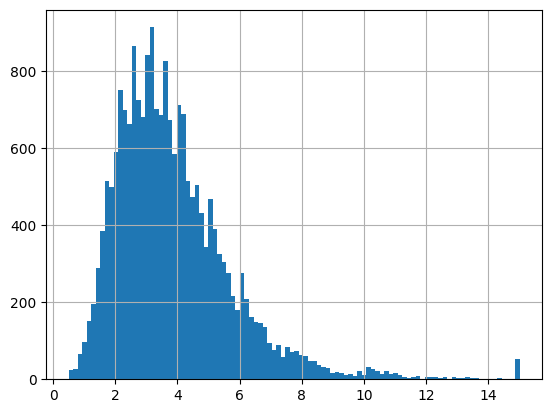

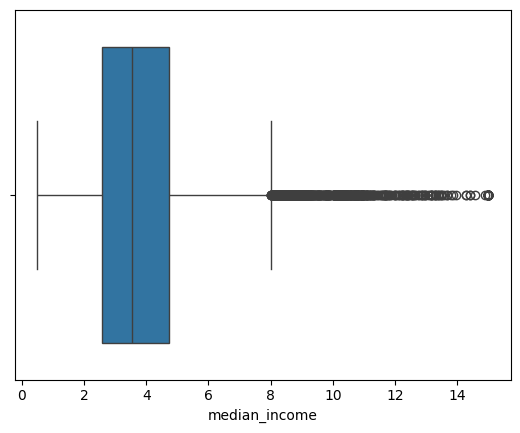

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
(20433, 9)


In [4]:
print(house.isna().sum())
house['median_income'].hist(bins=100)
# plt.title("Histogram of feature_name")
# plt.xlabel('Feature Name')
# plt.ylabel('Frequency')
plt.show()
sns.boxplot(x=house['median_income'])
# plt.title('Box Plot of feature_name')
plt.show()
house=house.dropna()
# house=house-house['ocean_proximity']
print(house.isna().sum())
print(house.shape)

Refining Data

In [5]:
features = ['housing_median_age','total_rooms','households','median_income']

# for feature in features:
#     Q1 = house[feature].quantile(0.25)
#     Q3 = house[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     house = house[(house[feature] >= lower_bound) & (house[feature] <= upper_bound)]
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.1,random_state=42)
iso.fit(house)
outlier=iso.predict(house)
house['out']=outlier
print(house.head())
housenew=house[house['out']==-1]
housenew.corr()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  out  
0         322         126         8.3252              452600   -1  
1        2401        1138         8.3014              358500   -1  
2         496         177         7.2574              352100    1  
3         558         219         5.6431              341300    1  
4         565         259         3.8462              342200    1  


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,out
longitude,1.000000,-0.928533,-0.273165,0.228930,0.235652,0.200090,0.197141,0.040348,-0.013860,NaN
latitude,-0.928533,1.000000,0.185764,-0.216939,-0.222781,-0.201273,-0.207379,-0.182301,-0.204535,NaN
housing_median_age,-0.273165,0.185764,1.000000,-0.467829,-0.412103,-0.399655,-0.393664,0.073287,0.219936,NaN
total_rooms,0.228930,-0.216939,-0.467829,1.000000,0.925915,0.870484,0.911834,-0.060341,-0.112673,NaN
total_bedrooms,0.235652,-0.222781,-0.412103,0.925915,1.000000,0.875737,0.978521,-0.250662,-0.216933,NaN
population,0.200090,-0.201273,-0.399655,0.870484,0.875737,1.000000,0.908085,-0.192051,-0.234981,NaN
households,0.197141,-0.207379,-0.393664,0.911834,0.978521,0.908085,1.000000,-0.231257,-0.196093,NaN
median_income,0.040348,-0.182301,0.073287,-0.060341,-0.250662,-0.192051,-0.231257,1.000000,0.747138,NaN
median_house_value,-0.013860,-0.204535,0.219936,-0.112673,-0.216933,-0.234981,-0.196093,0.747138,1.000000,NaN
out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
x=housenew[features]
y=housenew['median_house_value']

## Scaling Dataset

In [7]:
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler().fit_transform(x)

## Polynomial reg

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_f=PolynomialFeatures(degree=3)
x_poly=poly_f.fit_transform(x_scaled)

## Spliting Data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,Y_train.shape

((1430, 35), (614, 35), (1430,))

## linear regression 

In [10]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

# ridge=Ridge(alpha=0.9)
# ridge.fit(X_train,Y_train)
# y_pred=ridge.predict(X_test)
# Y_test=np.array(Y_test)
# error=mean_squared_error(y_pred,Y_test)
# print(error, "Ridge")
# print(r2_score(Y_test,y_pred))
# model=LinearRegression()
# model.fit(X_train,Y_train)
# y_pred2=model.predict(X_test)
# Y_test=np.array(Y_test)
# error2=mean_squared_error(y_pred2,Y_test)
# print(error2,'Linear')
# print(r2_score(Y_test,y_pred2))

#random forest--better Result 
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X_train,Y_train)
y_pred3=model.predict(X_test)
error3=mean_squared_error(y_pred3,Y_test)
print(error3,"Random_Forest")
print(r2_score(Y_test,y_pred3))

7300732363.253363 Random_Forest
0.7115529313417218


#### Checking output

In [11]:
y_pred3.shape ,Y_test.shape

((614,), (614,))

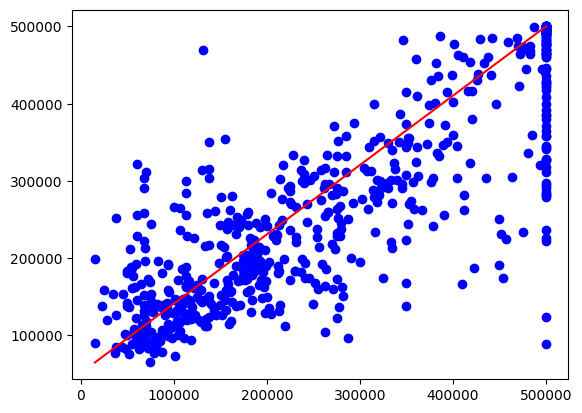

In [12]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,y_pred3,c="blue",label="training data")
plt.plot([min(y),max(y_pred3)],[min(y_pred3),max(y_pred3)],c="red",label="Regression line")
plt.xlabel="Actual Values"
plt.ylabel="Predicted"
plt.title="Linear Regression"
plt.show()